In [46]:
from load_data import load_data
import importlib_resources
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy.linalg import svd

In the Next part the data is loaded and different parameters is found. Then the attribute names is extracted and the unique target classes is defined. 

In [49]:
import os
cwd = os.getcwd()

data, target = load_data(cwd + '/data/wdbc.csv')

n_rows, n_cols = data.shape
print(n_rows, n_cols)

data_values = data.values

# Making the data matrix X by indexing into data.
cols = range(0, 29)

X = data_values[:, cols]

# Extracting the attribute names from the header
attributeNames = np.asarray(data.columns[cols])

#Finding and determining the unique class names in the target data
# Finding and determining the unique class names in the target data
classNames, classCounts = np.unique(target, return_counts=True)

#Assigning each class with a number by making a Python dictionary
classDict = dict(zip(classNames, range(len(classNames))))


#Making class index vector y: #Not used in our case
y = np.array([classDict[cl] for cl in target])

# Finding the number of data objects and number of attributes using the shape of X
N, M = X.shape

#Finding number of classes, C:
C = len(classNames)

569 30


Finding the number of missing values and vizualizing this. In our case there isn't any so the plot isn't really showing much.

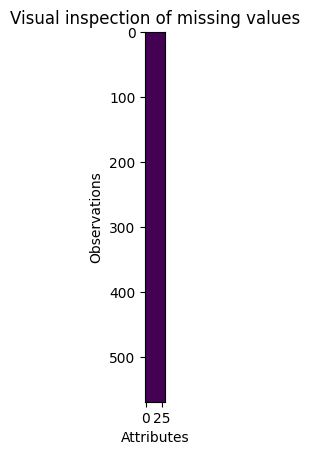

In [50]:
# missing values:
missing_idx = np.isnan(data)
obs_w_missing = np.sum(missing_idx, 1) > 0

#Plot over missing values
plt.title("Visual inspection of missing values")
plt.imshow(missing_idx)
plt.ylabel("Observations")
plt.xlabel("Attributes")
plt.show()

Then we want to describe the data in each attribute, to do that the mean, SD, median and range is calculated.

In [51]:
# Compute values for every attribute
for i, attribute in enumerate(attributeNames):
    x = X[:, i]  # Extracting individual attribute column
    
    mean_x = np.mean(x)
    std_x = np.std(x, ddof=1)  # ddof: Delta Degrees of Freedom
    std_b_x = np.std(x, ddof=0)
    median_x = np.median(x)
    range_x = np.max(x) - np.min(x)
    
    # Display results
    print(f"Attribute: {attribute}")
    print(f"  Mean: {mean_x}")
    print(f"  Standard Deviation: {std_x}")
    print(f"  Standard Deviation (biased): {std_b_x}")
    print(f"  Median: {median_x}")
    print(f"  Range: {range_x}")

# Printing the number of instances per class
print("Class distribution:")
for class_name, count in zip(classNames, classCounts):
    print(f"{class_name}: {count}")

Attribute: Radius Mean
  Mean: 14.127291739894552
  Standard Deviation: 3.5240488262120775
  Standard Deviation (biased): 3.520950760711062
  Median: 13.37
  Range: 21.128999999999998
Attribute: Texture Mean
  Mean: 19.289648506151142
  Standard Deviation: 4.301035768166949
  Standard Deviation (biased): 4.297254637090421
  Median: 18.84
  Range: 29.57
Attribute: Perimeter Mean
  Mean: 91.96903339191564
  Standard Deviation: 24.298981038754906
  Standard Deviation (biased): 24.27761929305318
  Median: 86.24
  Range: 144.71
Attribute: Area Mean
  Mean: 654.8891036906855
  Standard Deviation: 351.914129181653
  Standard Deviation (biased): 351.60475406323
  Median: 551.1
  Range: 2357.5
Attribute: Smoothness Mean
  Mean: 0.0963602811950791
  Standard Deviation: 0.01406412813767362
  Standard Deviation (biased): 0.014051764066591203
  Median: 0.09587
  Range: 0.11076999999999998
Attribute: Compactness Mean
  Mean: 0.10434098418277679
  Standard Deviation: 0.052812757932512194
  Standard D

We want to take a closer look on the attributes so we make a matrix histogram plot of all the attributes.

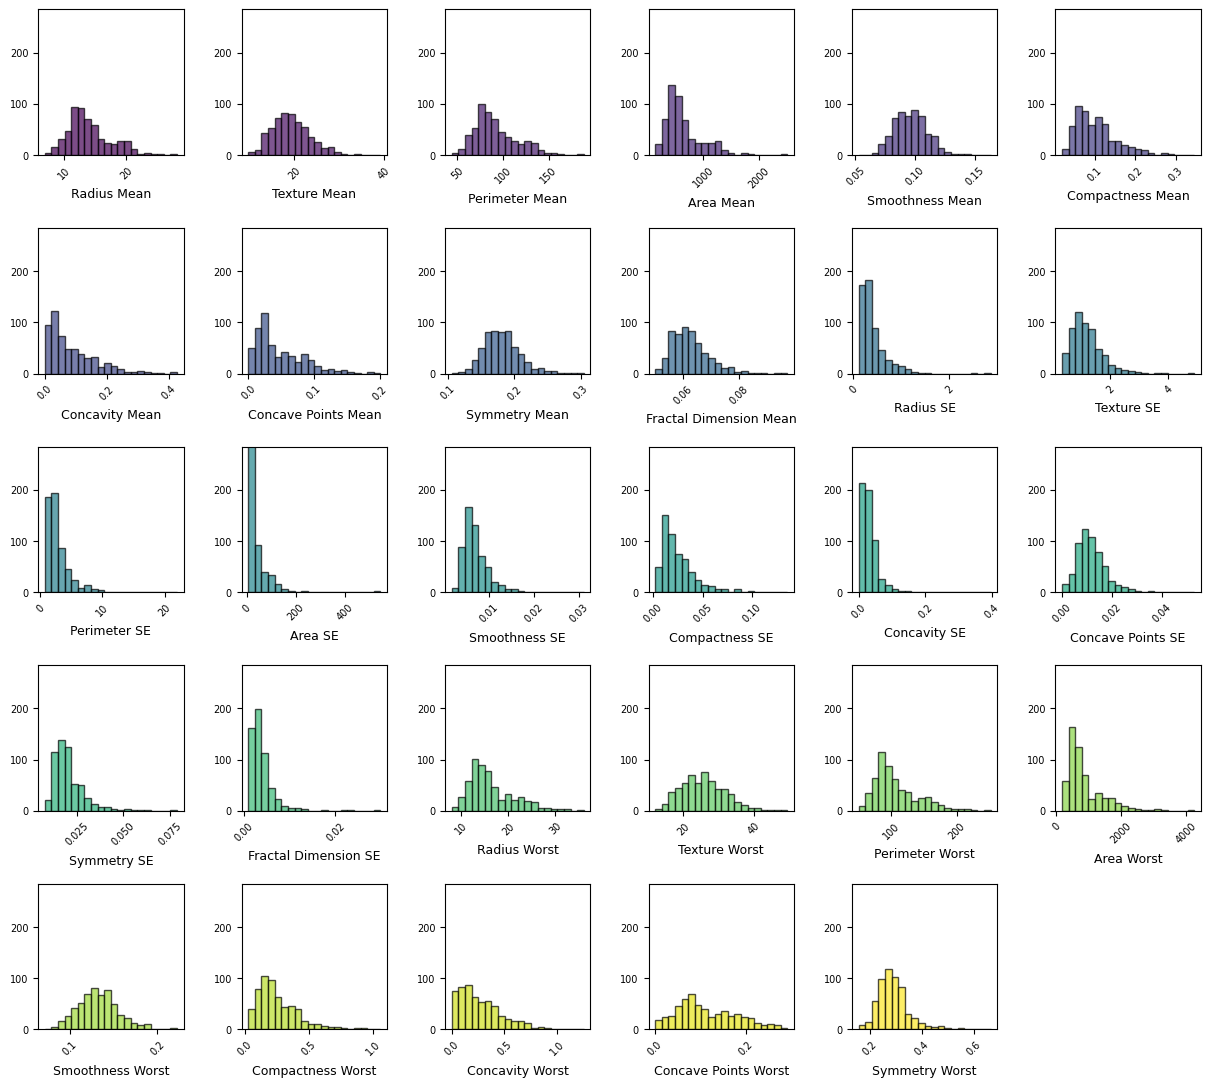

In [43]:

u = int(np.floor(np.sqrt(M)))
v = int(np.ceil(M / u))

# Use a colormap to assign different colors to the histograms
colors = cm.viridis(np.linspace(0, 1, M))  # Generates M unique colors

plt.figure(figsize=(15, 12))  

for i in range(M):
    plt.subplot(u, v, i + 1)
    plt.hist(X[:, i], bins=20, color=colors[i], edgecolor="black", alpha=0.7)  # Adjust bin size
    plt.xlabel(attributeNames[i], fontsize=9, labelpad=5)
    plt.xticks(fontsize=7, rotation=45)  # Rotate labels for readability
    plt.yticks(fontsize=7)
    plt.ylim(0, N / 2)  # Limit y-axis for consistency

# Adjust layout to prevent overlap
plt.subplots_adjust(hspace=0.5, wspace=0.4, bottom=0.1, top=0.95)

plt.show()


For the target data we want to look at the distrubution of the classes. We make a bar chart to show the split.

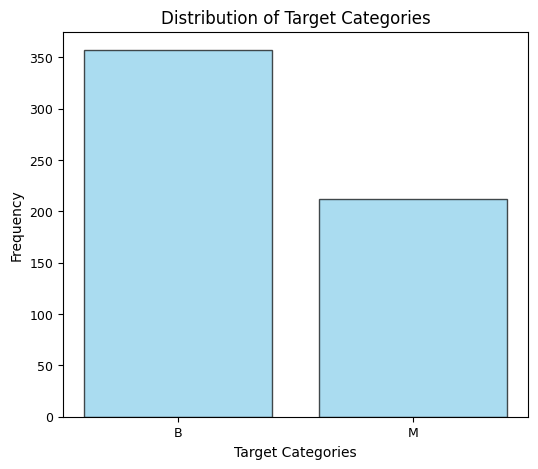

In [11]:
# Bar chart for target distribution
plt.figure(figsize=(6, 5))  

# Class count
_, class_counts = np.unique(target, return_counts=True)

# Plot bar chart
plt.bar(classNames, class_counts, color='skyblue', edgecolor="black", alpha=0.7)
plt.xlabel("Target Categories", fontsize=10)
plt.ylabel("Frequency", fontsize=10)
plt.title("Distribution of Target Categories")
plt.xticks(classNames, fontsize=9)
plt.yticks(fontsize=9)

plt.show()

To futher look at the data we create a common bowplot for all the attributes

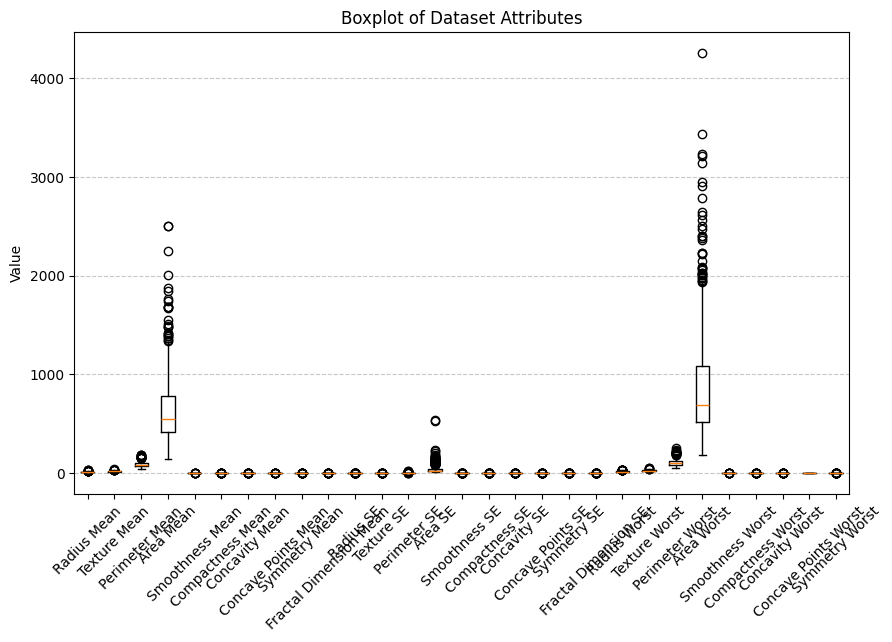

In [12]:
#Boxplot for all attributes in X
plt.figure(figsize=(10, 6))  
plt.boxplot(X) 
# adjusting x-axis labels to match dataset attributes
plt.xticks(range(1, X.shape[1] + 1), attributeNames, rotation=45)  # Rotate labels if long

plt.ylabel("Value") 
plt.title("Boxplot of Dataset Attributes") 
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

The plot didn't work great because the data in some of the attributes are much bigger than the others. To prevent this we standardize the data make a new plot.

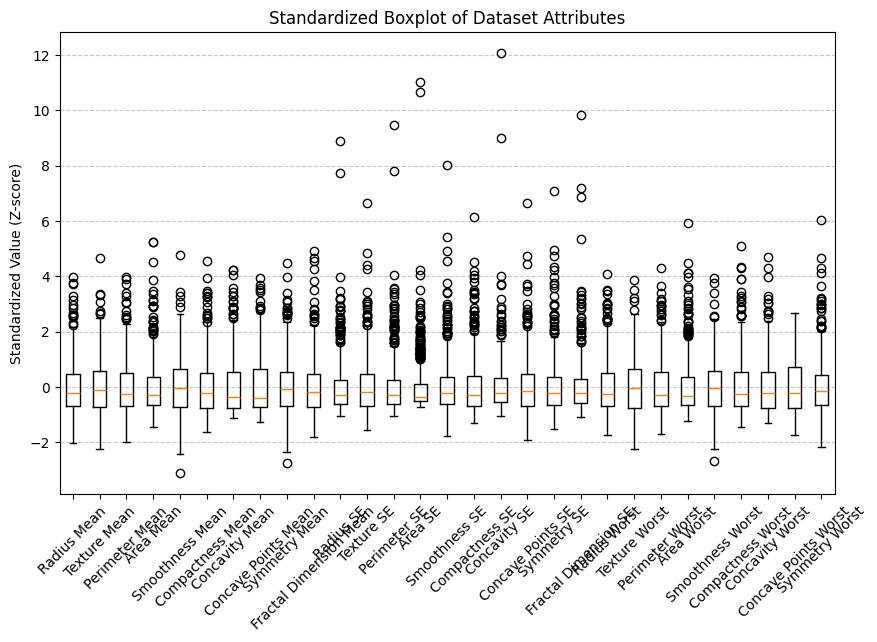

In [13]:
# Standardize X
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)  # Transformed dataset (mean=0, std=1)
# Can also be done by useing 
# from scipy.stats import zscore
#_standarized = zscore(X, ddof=1)  

# Boxplot for standardized attributes
plt.figure(figsize=(10, 6))
plt.boxplot(X_standardized)  
# Adjust x-axis labels
plt.xticks(range(1, X.shape[1] + 1), attributeNames, rotation=45)  

plt.ylabel("Standardized Value (Z-score)")  
plt.title("Standardized Boxplot of Dataset Attributes")  
plt.grid(axis="y", linestyle="--", alpha=0.7)  

plt.show()

Another way to look at the boxplot is the devide betweeen the two classes. This is done in the following:

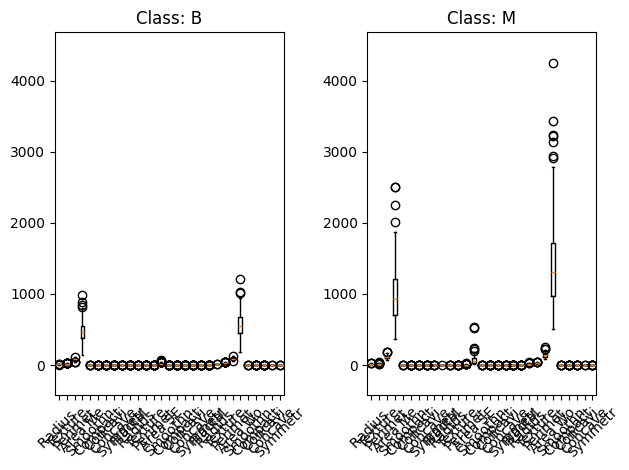

In [14]:
#Class boxplot
for c in range(C):
    plt.subplot(1, C, c + 1)  # Create subplot for each class
    class_mask = y == c  # Filter rows belonging to class c

    plt.boxplot(X[class_mask, :])  # Boxplot only for class c
    plt.title("Class: " + str(classNames[c]))  # Add title with class name

    # Set x-axis labels, truncate long names for readability
    plt.xticks(range(1, X.shape[1] + 1), [a[:7] for a in attributeNames], rotation=45)

    # Set consistent y-axis limits for comparison
    y_up = X.max() + (X.max() - X.min()) * 0.1
    y_down = X.min() - (X.max() - X.min()) * 0.1
    plt.ylim(y_down, y_up)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


This again isn't great as the data isn't standardized. We standardize the date and do the same plot.

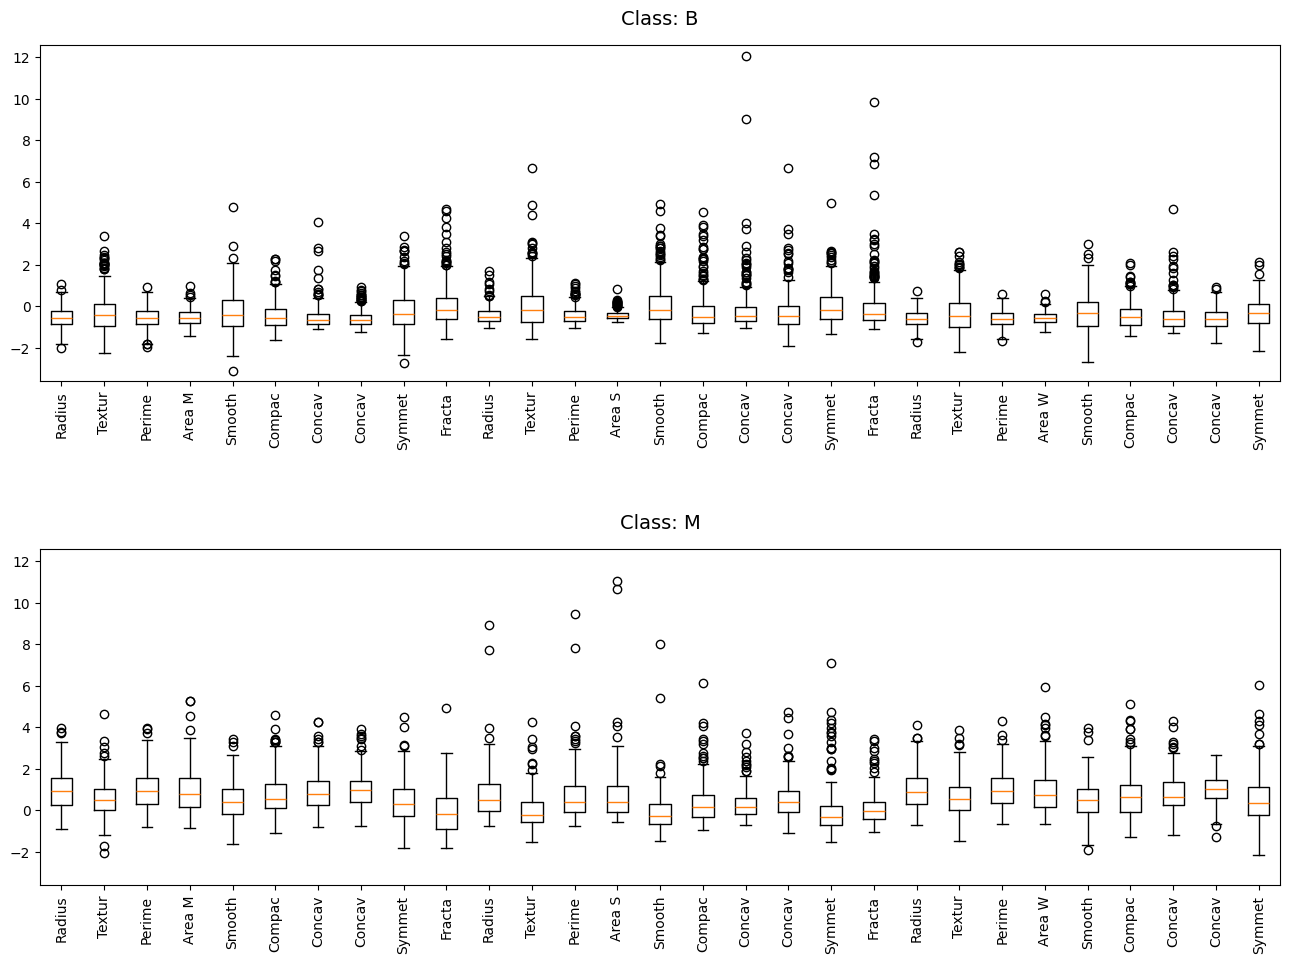

In [42]:

# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Determine dynamic y-axis limits
y_min = np.min(X_standardized) - 0.5  # Add a margin below min value
y_max = np.max(X_standardized) + 0.5  # Add a margin above max value

# Increase figure size to prevent any cutting
plt.figure(figsize=(16, 12))  

for c in range(C):
    plt.subplot(C, 1, c + 1)
    class_mask = y == c
    plt.boxplot(X_standardized[class_mask, :], vert=True)  
    plt.title(f"Class: {classNames[c]}", fontsize=14, pad=15)  # Adjust title spacing

    # Set x-axis labels
    shortened_labels = [a[:6] for a in attributeNames]  
    plt.xticks(range(1, X.shape[1] + 1), shortened_labels, rotation=90, ha='center', fontsize=10)  

    # Set dynamic y-axis limits
    plt.ylim(y_min, y_max)  

# Prevent clipping when saving the figure
plt.subplots_adjust(bottom=0.2, hspace=0.5, top=0.9)  
plt.show()


We do this plot again but a little differently, this time looking at each attribute on its own

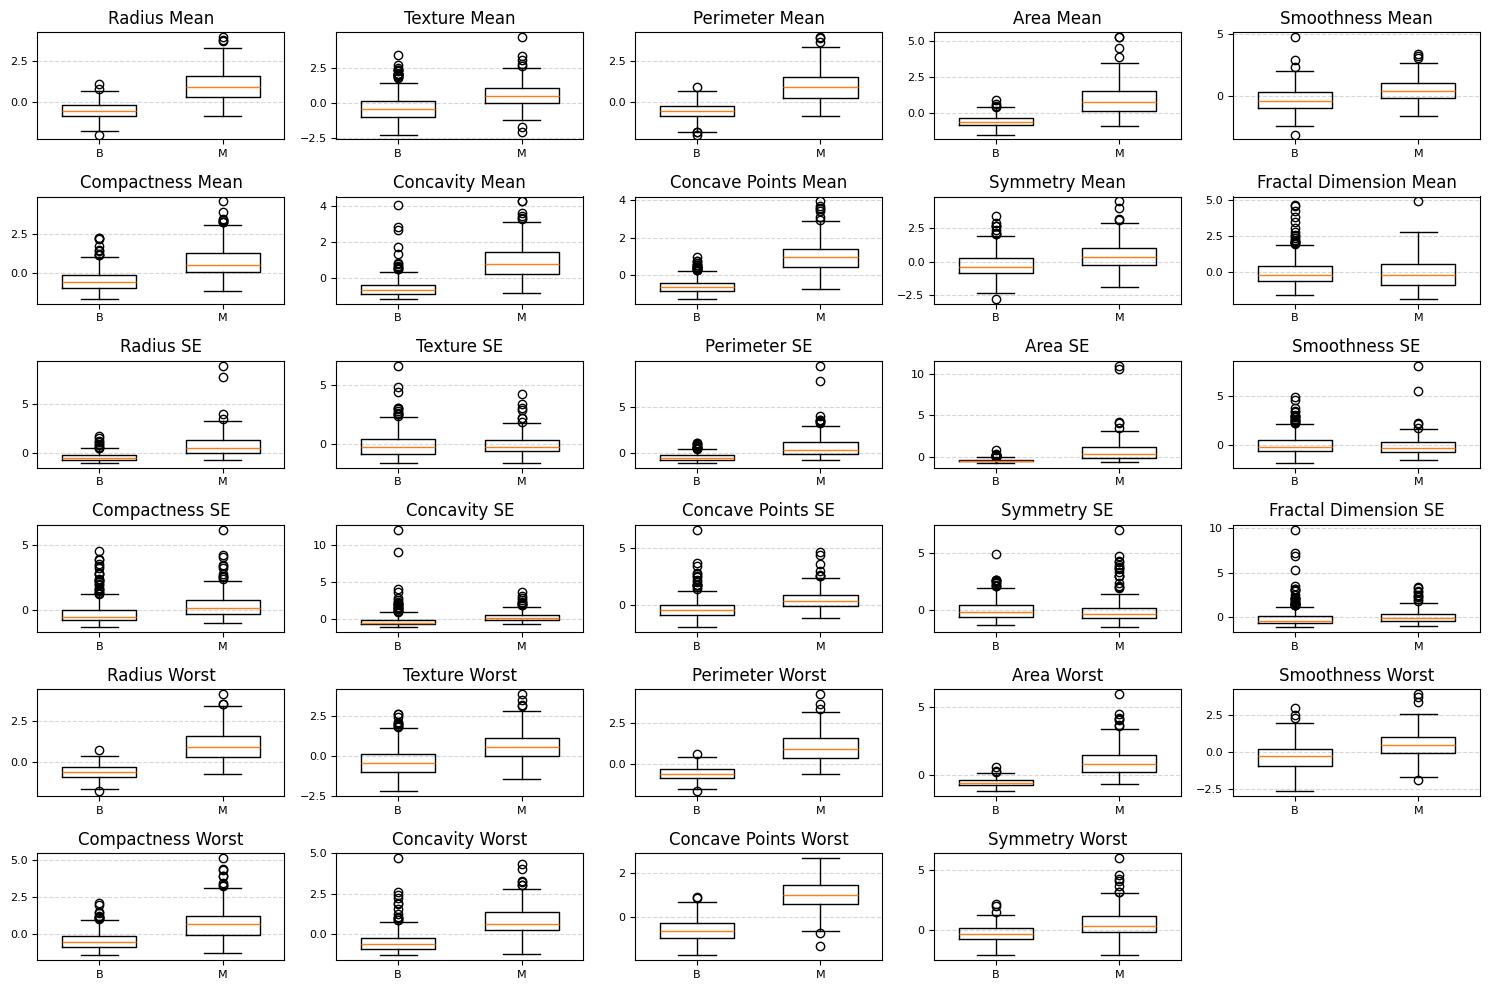

In [15]:
#Stadardized class boxplot
plt.figure(figsize=(15, 10))  # Adjust size

# Loop over each attribute to create a separate boxplot
for i in range(M):
    plt.subplot(int(np.ceil(M / 5)), 5, i + 1)  # Arrange in a grid
    for c in range(C):
        class_mask = y == c  # Filter by class
        plt.boxplot(X_standardized[class_mask, i], positions=[c + 1], widths=0.6)

    plt.title(attributeNames[i])  # Attribute name as title
    plt.xticks([1, 2], classNames, fontsize=8)  # Class labels
    plt.yticks(fontsize=8)
    plt.grid(axis='y', linestyle="--", alpha=0.5)  # Light grid

plt.tight_layout()
plt.show()

We want to look at the realtionship between the attributes. To do that we make a matrix plot where every attribute is plotted against each other.

/var/folders/98/9xrylt1s0s51fbpfsffl_zn00000gn/T/ipykernel_45816/148981480.py:21: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


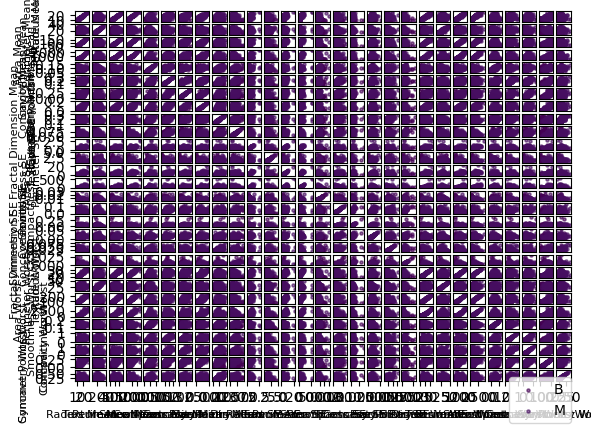

In [16]:
#Matrix of scatter plots, showing the relationship between every pair of attributes in X
for m1 in range(M):  
    for m2 in range(M):
        plt.subplot(M, M, m1 * M + m2 + 1)
        
        for c, color in zip(np.unique(y), colors):  #Loop through the unique class labels
            class_mask = y == c
            plt.scatter(X[class_mask, m2], X[class_mask, m1], color=color, s=5, alpha=0.6, label=classNames[c])
        
        if m1 == M - 1:
            plt.xlabel(attributeNames[m2], fontsize=8)
        else:
            plt.xticks([])

        if m2 == 0:
            plt.ylabel(attributeNames[m1], fontsize=8)
        else:
            plt.yticks([])
        
plt.legend(classNames, loc="upper right", bbox_to_anchor=(1.5, 1.0))
plt.tight_layout()
plt.show()


The plot above is a far to complicated plot to gain any knowlegde from. Instead of looking at all the attributes we look at selected relationships. To find the selected pairs we look for the ones with the highest correlations (above 0.7). We plot the 9 pairs with the highest correlation against eachother.

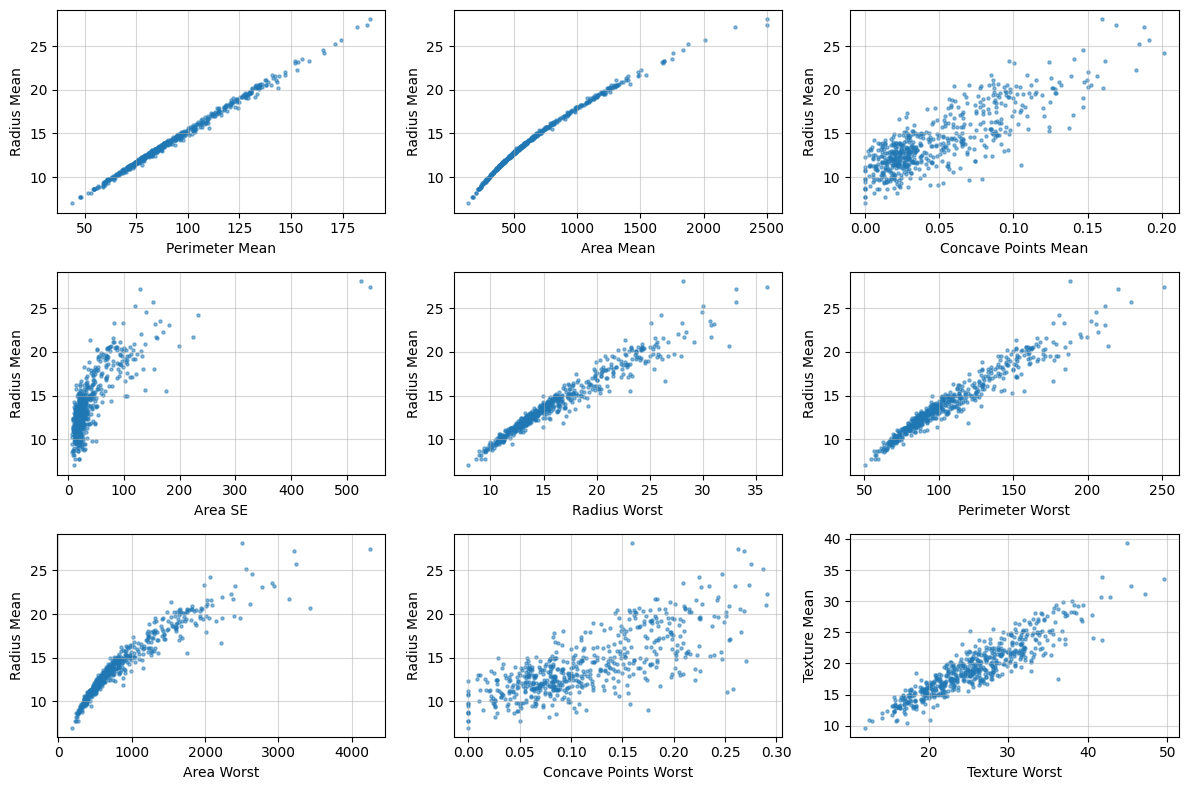

In [17]:
# Scatter plot of selected attribute relationships
# Compute correlation matrix
corr_matrix = np.corrcoef(X.T)

# Find strongest correlations (absolute > 0.7)
strong_pairs = np.argwhere(np.abs(corr_matrix) > 0.7)

# Remove duplicate pairs and diagonal (self-correlation)
strong_pairs = [(i, j) for i, j in strong_pairs if i < j]

# Plot only the selected scatter plots
plt.figure(figsize=(12, 8))
for idx, (m1, m2) in enumerate(strong_pairs[:9]):  # Show top 9 pairs
    plt.subplot(3, 3, idx + 1)
    plt.scatter(X[:, m2], X[:, m1], alpha=0.5, s=5)
    plt.xlabel(attributeNames[m2])
    plt.ylabel(attributeNames[m1])
    plt.grid(alpha=0.5)

plt.tight_layout()
plt.show()

To take a further look at the correlation we make a heatmap over the correlation betwwen all the attributes.

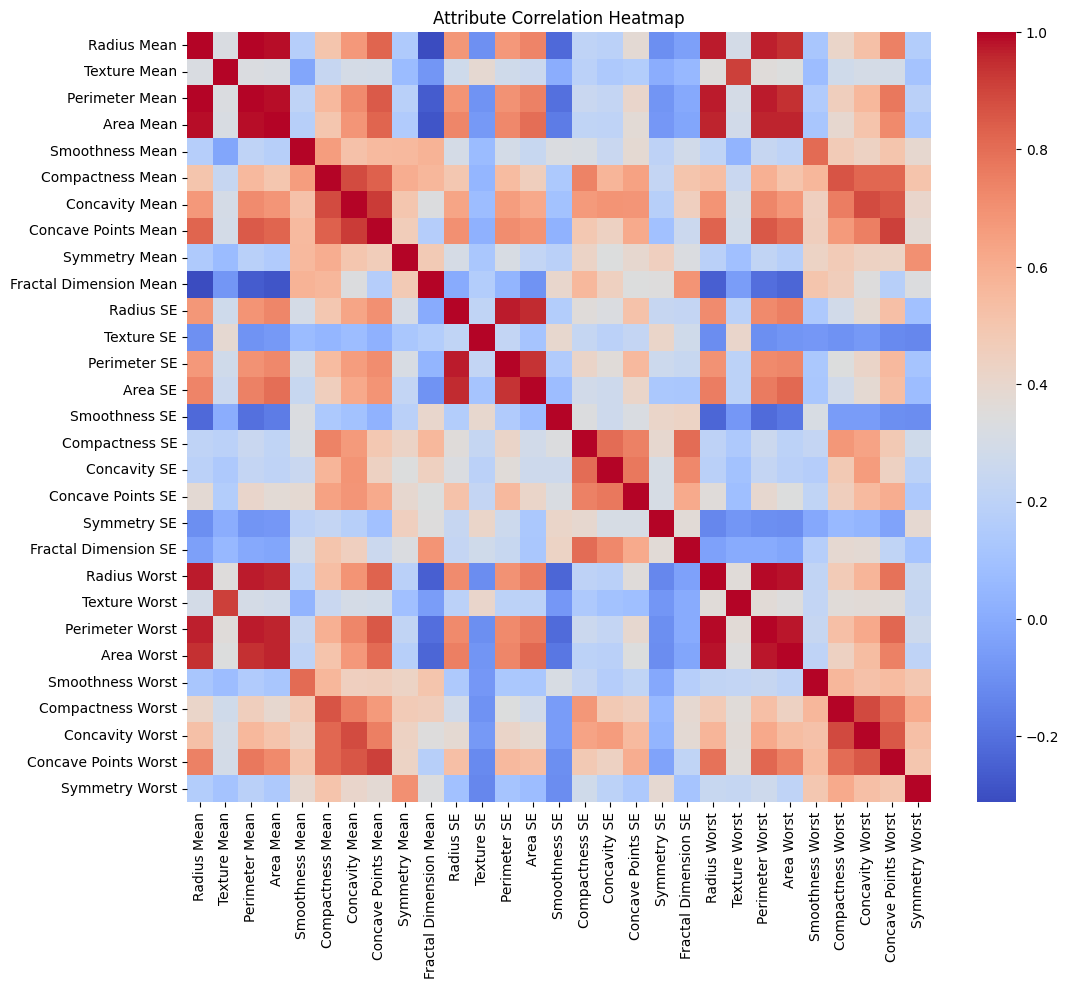

In [18]:
#Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(np.corrcoef(X.T), cmap="coolwarm", annot=False, xticklabels=attributeNames, yticklabels=attributeNames)
plt.title("Attribute Correlation Heatmap")
plt.show()


For fun we plot the strongest attributes against eachother in a 3D scatterplot

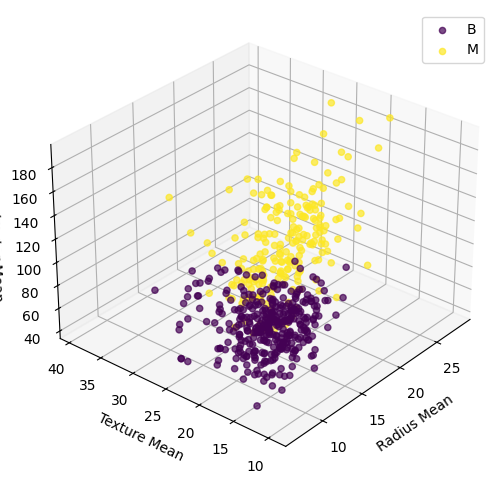

In [19]:
#3D scatter plot

# Extract unique feature indices from the strongest correlations
top_features = list(set(i for pair in strong_pairs for i in pair))[:3]

ind = top_features  # Set indices for 3D plot

# Use a colormap for class colors
colors = cm.viridis(np.linspace(0, 1, C))

# Create figure and 3D axis
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

# Loop through each class and plot
for c, color in zip(np.unique(y), colors):
    class_mask = y == c
    ax.scatter(
        X[class_mask, ind[0]], X[class_mask, ind[1]], X[class_mask, ind[2]], 
        color=color, label=classNames[c], alpha=0.7
    )

# Adjust viewing angle
ax.view_init(30, 220)

# Set axis labels dynamically based on selected features
ax.set_xlabel(attributeNames[ind[0]], fontsize=10)
ax.set_ylabel(attributeNames[ind[1]], fontsize=10)
ax.set_zlabel(attributeNames[ind[2]], fontsize=10)

ax.legend(loc="best")
plt.show()

We create another heatmap to visualizes the standardized data matrix - which means that it shows how each attribute varies across different data samples after standardization.

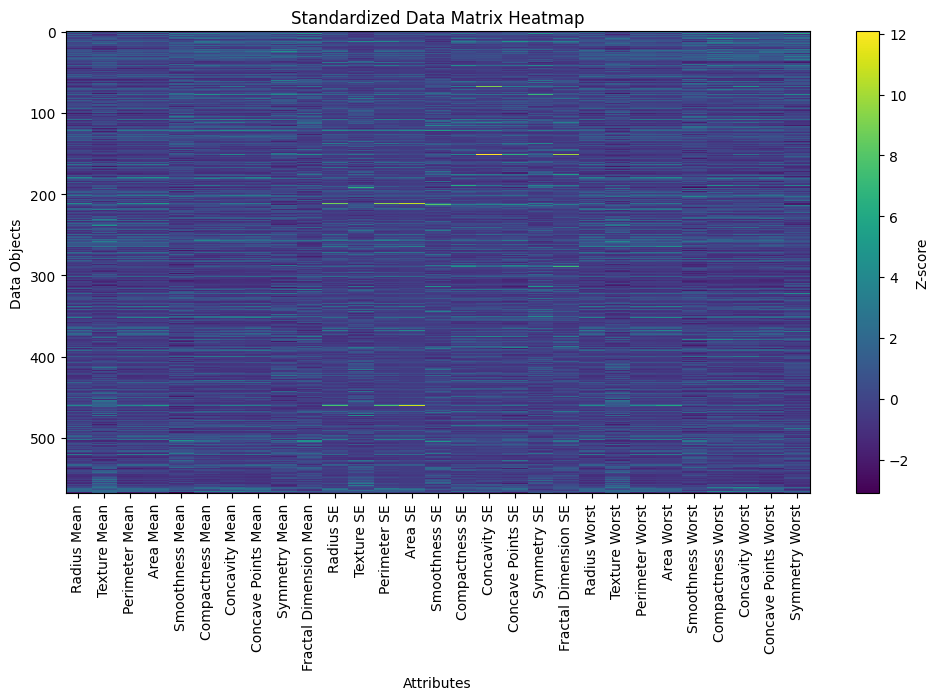

In [20]:
#Another heatmap
plt.figure(figsize=(12, 6))
plt.imshow(X_standardized, interpolation="none", aspect="auto", cmap=plt.cm.viridis)  # Use 'viridis' for better contrast

# Adjust x-axis labels dynamically
plt.xticks(range(X.shape[1]), attributeNames, rotation=90)  # Rotate labels for readability

plt.xlabel("Attributes")
plt.ylabel("Data Objects")
plt.title("Standardized Data Matrix Heatmap")

# Add color scale
plt.colorbar(label="Z-score")
plt.show()

We then plot the 5 most correlated attributed pairs against each other.

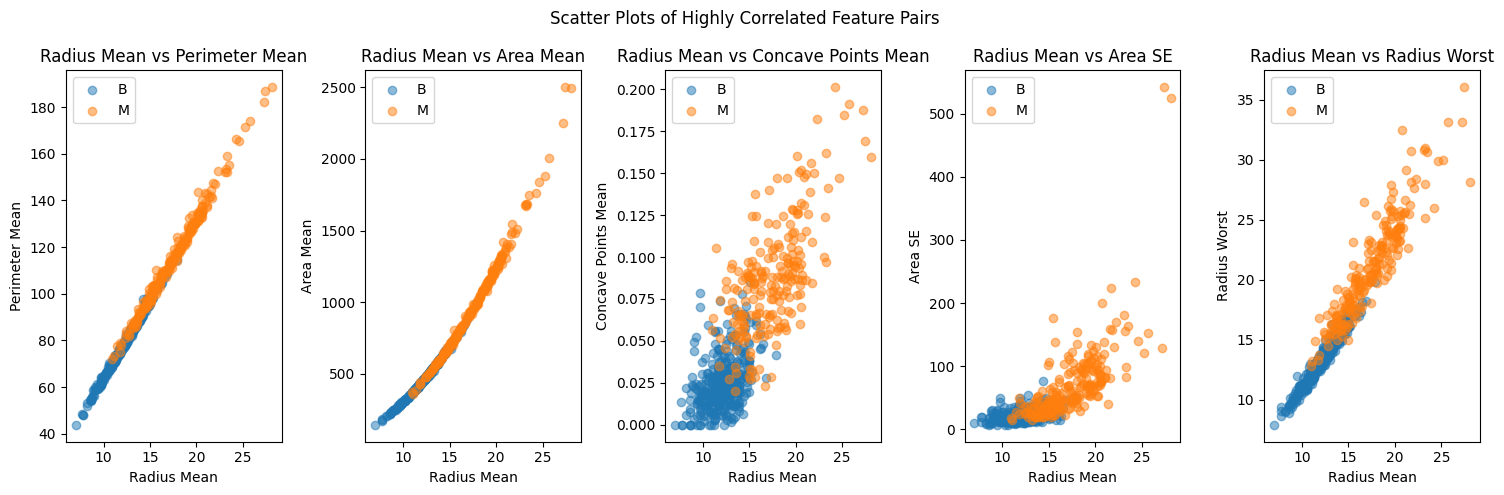

In [21]:
# Plotting the 5 strongest attribute pairs against eachother in a scatterplot
num_pairs_to_plot = min(5, len(strong_pairs))  

# Create subplots for multiple attribute pair scatter plots
fig, axes = plt.subplots(1, num_pairs_to_plot, figsize=(15, 5))  

# Loop through selected pairs and plot them
for idx, (i, j) in enumerate(strong_pairs[:num_pairs_to_plot]):
    ax = axes[idx] if num_pairs_to_plot > 1 else axes  # Handle single vs multiple subplots
    
    for c in range(C):
        class_mask = y == c  # Select data points belonging to class c
        ax.scatter(X[class_mask, i], X[class_mask, j], alpha=0.5, label=classNames[c])
    
    ax.set_xlabel(attributeNames[i])
    ax.set_ylabel(attributeNames[j])
    ax.set_title(f"{attributeNames[i]} vs {attributeNames[j]}")
    ax.legend()

plt.suptitle("Scatter Plots of Highly Correlated Feature Pairs")
plt.tight_layout()
plt.show()


The we create PCA and analyse the PCA on the non standardized data.

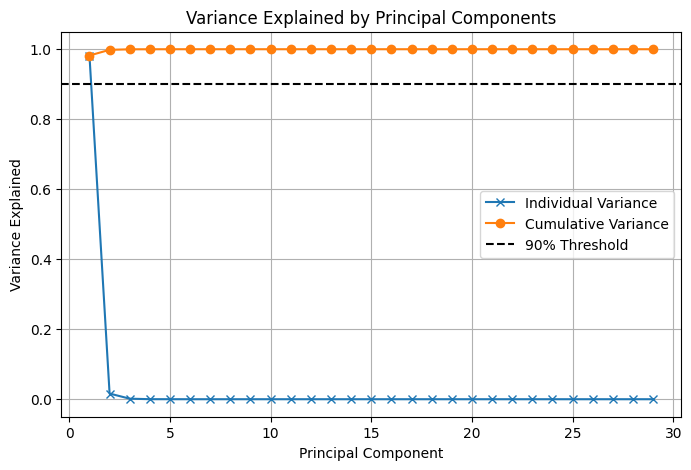

Minimum number of principal components to reach 90% variance: 1


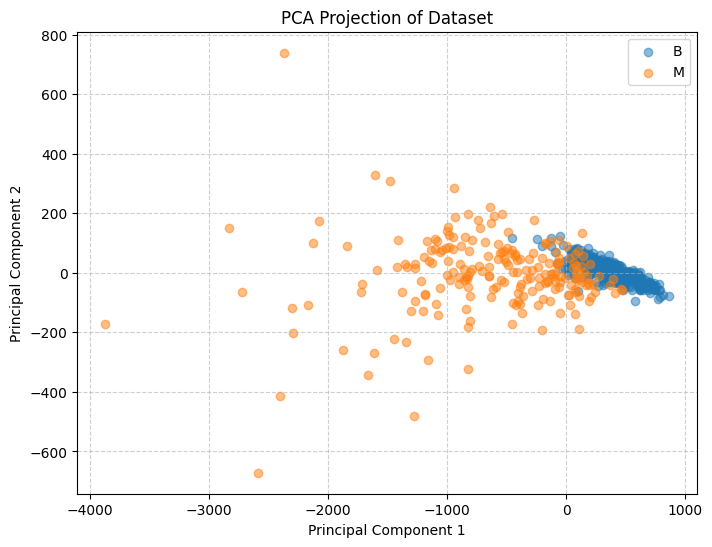

PC1 explains 98.20% of variance
PC2 explains 1.62% of variance


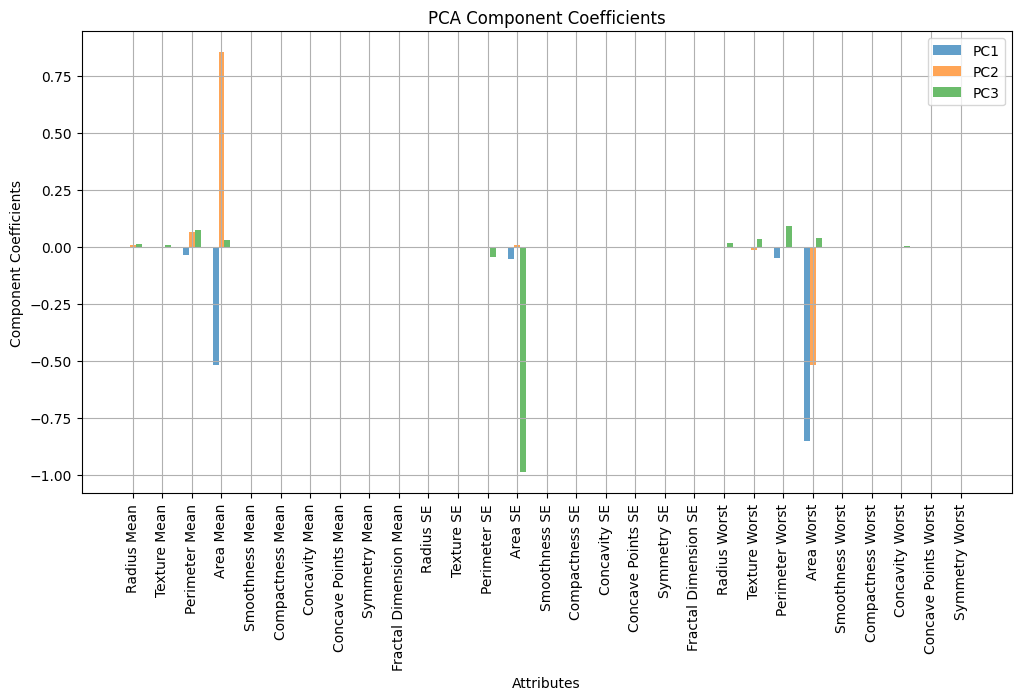

PC2 Coefficients:
[ 9.28705652e-03 -2.88160653e-03  6.27480830e-02  8.51823722e-01
 -1.48194347e-05 -2.68861775e-06  7.51419629e-05  4.63501057e-05
 -2.52430416e-05 -1.61197141e-05 -5.38692833e-05  3.48370413e-04
  8.19640806e-04  7.51112433e-03  1.49438136e-06  1.27357972e-05
  2.86921028e-05  9.36007505e-06  1.22647433e-05  2.89684005e-07
 -5.68673325e-04 -1.32152604e-02 -1.85960748e-04 -5.19742359e-01
 -7.68565676e-05 -2.56104128e-04 -1.75471461e-04 -3.05051703e-05
 -1.57042841e-04]
First observation of class B
[-5.87291740e-01 -4.92964851e+00 -4.50903339e+00 -8.85891037e+01
  1.42971880e-03 -2.30509842e-02 -2.21593158e-02 -1.10914587e-03
  7.33813708e-03 -5.13760984e-03 -1.35272056e-01 -4.28253427e-01
 -8.08059227e-01 -1.67770791e+01  1.42102109e-03 -1.08781388e-02
 -8.02371634e-03  1.35386292e-03 -7.42298770e-04 -1.49490387e-03
 -1.15918981e+00 -6.41722320e+00 -7.56121265e+00 -1.69383128e+02
  1.16314060e-02 -7.69650439e-02 -3.31884833e-02  1.41937768e-02
  7.62442882e-03]
...and 

In [22]:
#PCA on data

# Standardize X by centering around zero mean
Y = X - np.mean(X, axis=0)

# Perform PCA using SVD
U, S, Vh = svd(Y, full_matrices=False)
V = Vh.T  # Transpose to get correct PCA component orientations

# Compute variance explained by each principal component
rho = (S ** 2) / np.sum(S ** 2)

# Threshold for variance explained (e.g., 90%)
threshold = 0.9

# Plot variance explained
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(rho) + 1), rho, "x-", label="Individual Variance")
plt.plot(range(1, len(rho) + 1), np.cumsum(rho), "o-", label="Cumulative Variance")
plt.axhline(y=threshold, color="k", linestyle="--", label="90% Threshold")
plt.title("Variance Explained by Principal Components")
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.legend()
plt.grid()
plt.show()

# Print how many components explain at least 90% of variance
num_components = np.argmax(np.cumsum(rho) >= threshold) + 1
print(f"Minimum number of principal components to reach {threshold * 100:.0f}% variance: {num_components}")


#Looking at the dfirst PCA's

Z = Y @ V  # Transformed data in PCA space
pc1, pc2 = 0, 1  # First two principal components

plt.figure(figsize=(8, 6))
plt.title("PCA Projection of Dataset")

# Scatter plot for each class
for c in range(C):
    class_mask = y == c
    plt.scatter(Z[class_mask, pc1], Z[class_mask, pc2], alpha=0.5, label=classNames[c])

# Labels, legend, and grid
plt.xlabel(f"Principal Component {pc1 + 1}")
plt.ylabel(f"Principal Component {pc2 + 1}")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()

# Print variance explained
var_explained = (S ** 2) / np.sum(S ** 2)
print(f"PC1 explains {var_explained[0] * 100:.2f}% of variance")
print(f"PC2 explains {var_explained[1] * 100:.2f}% of variance")


#Looking further at the first three PCA's
# Selecting principal components to analyze
pcs = [0, 1, 2]  # First three PCs
legendStrs = [f"PC{e + 1}" for e in pcs]
bw = 0.2  # Bar width
r = np.arange(1, M + 1)  # Attribute indices

# Plot PCA Component Coefficients
plt.figure(figsize=(12, 6))
for i in pcs:
    plt.bar(r + i * bw, V[:, i], width=bw, alpha=0.7)

plt.xticks(r + bw, attributeNames, rotation=90)  # Rotate labels for clarity
plt.xlabel("Attributes")
plt.ylabel("Component Coefficients")
plt.legend(legendStrs)
plt.grid()
plt.title("PCA Component Coefficients")
plt.show()

# Print PC2 Coefficients
print("PC2 Coefficients:")
print(V[:, 1].T)

# Project a selected class (e.g., first class) onto PC2
selected_class = 0  # Change this to analyze other classes
selected_class_data = Y[y == selected_class, :]

print(f"First observation of class {classNames[selected_class]}")
print(selected_class_data[0, :])

print(f"...and its projection onto PC2")
print(selected_class_data[0, :] @ V[:, 1])


We then do the same on the data but now we standardize the data.

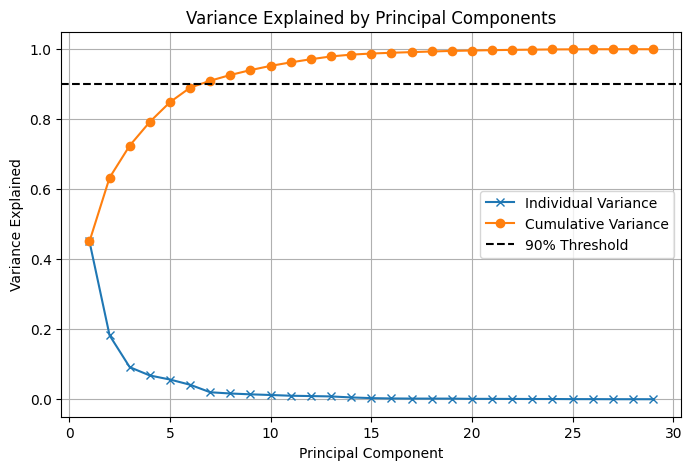

Minimum number of principal components to reach 90% variance: 7


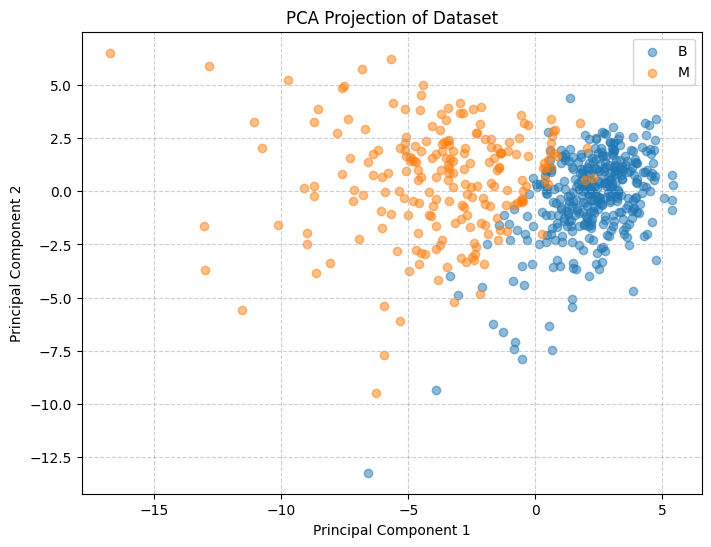

PC1 explains 45.07% of variance
PC2 explains 18.24% of variance


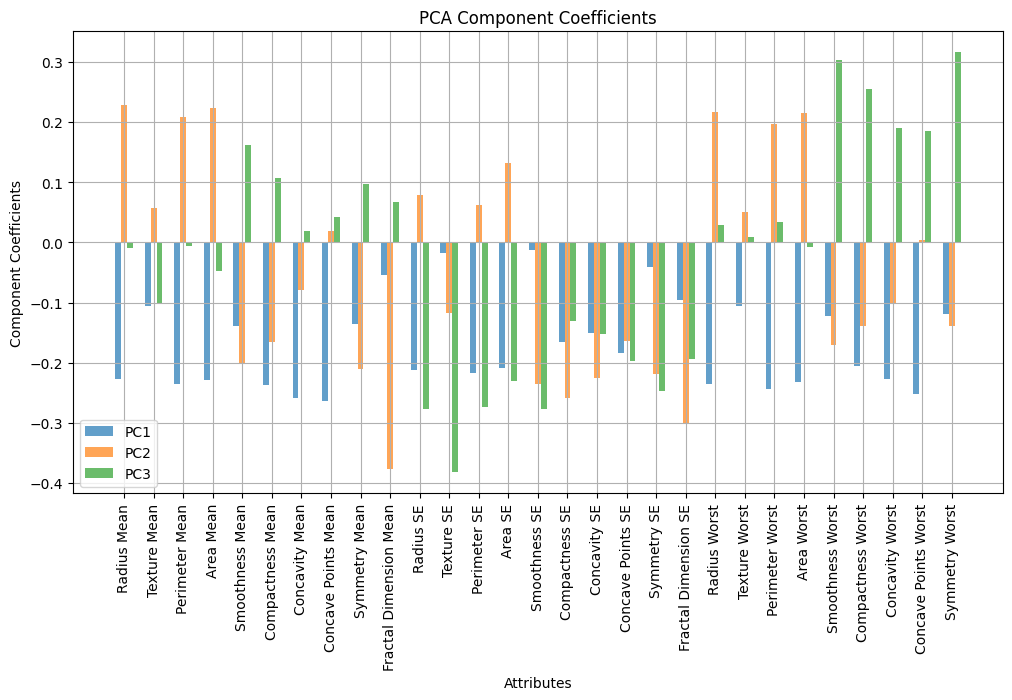

PC2 Coefficients:
[ 0.22780107  0.0572322   0.20808172  0.22287134 -0.20008179 -0.16606347
 -0.07860662  0.01935125 -0.20976473 -0.37611502  0.07908613 -0.11761797
  0.0624421   0.13183855 -0.23600194 -0.25787083 -0.22481578 -0.16427838
 -0.21866572 -0.30230199  0.21694786  0.05036467  0.1958919   0.21486032
 -0.16988285 -0.13931992 -0.10023117  0.00446162 -0.13950802]
First observation of class B
[-0.16679919 -1.1471623  -0.18572799 -0.2519565   0.10174657 -0.43685025
 -0.27820957 -0.02860929  0.26791123 -0.72830966 -0.48822526 -0.77699899
 -0.40001405 -0.36912442  0.4736929  -0.60797417 -0.26604255  0.21960965
 -0.08987642 -0.56544939 -0.24004796 -1.04500496 -0.22521706 -0.29776075
  0.50987305 -0.48960521 -0.15922253  0.21612292  0.12334653]
...and its projection onto PC2
0.09972844591172347


In [23]:
#PCA but on standarized data

# Standardize X using StandardScaler (zero mean, unit variance)
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Perform PCA using SVD
U, S, Vh = svd(X_std, full_matrices=False)
V = Vh.T  # Transpose to get correct PCA component orientations

# Compute variance explained by each principal component
rho = (S ** 2) / np.sum(S ** 2)

# Threshold for variance explained (e.g., 90%)
threshold = 0.9

# Plot variance explained
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(rho) + 1), rho, "x-", label="Individual Variance")
plt.plot(range(1, len(rho) + 1), np.cumsum(rho), "o-", label="Cumulative Variance")
plt.axhline(y=threshold, color="k", linestyle="--", label="90% Threshold")
plt.title("Variance Explained by Principal Components")
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.legend()
plt.grid()
plt.show()

# Print how many components explain at least 90% of variance
num_components = np.argmax(np.cumsum(rho) >= threshold) + 1
print(f"Minimum number of principal components to reach {threshold * 100:.0f}% variance: {num_components}")

# Transform data to PCA space
Z = X_std @ V
pc1, pc2 = 0, 1  # First two principal components

plt.figure(figsize=(8, 6))
plt.title("PCA Projection of Dataset")

# Scatter plot for each class
for c in range(C):
    class_mask = y == c
    plt.scatter(Z[class_mask, pc1], Z[class_mask, pc2], alpha=0.5, label=classNames[c])

# Labels, legend, and grid
plt.xlabel(f"Principal Component {pc1 + 1}")
plt.ylabel(f"Principal Component {pc2 + 1}")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# Print variance explained
print(f"PC1 explains {rho[0] * 100:.2f}% of variance")
print(f"PC2 explains {rho[1] * 100:.2f}% of variance")

# Analyzing the first three PCs
pcs = [0, 1, 2]  # First three PCs
legendStrs = [f"PC{e + 1}" for e in pcs]
bw = 0.2  # Bar width
r = np.arange(1, M + 1)  # Attribute indices

# Plot PCA Component Coefficients
plt.figure(figsize=(12, 6))
for i in pcs:
    plt.bar(r + i * bw, V[:, i], width=bw, alpha=0.7)

plt.xticks(r + bw, attributeNames, rotation=90)
plt.xlabel("Attributes")
plt.ylabel("Component Coefficients")
plt.legend(legendStrs)
plt.grid()
plt.title("PCA Component Coefficients")
plt.show()


# Print PC2 Coefficients
print("PC2 Coefficients:")
print(V[:, 1].T)

# Project a selected class (e.g., first class) onto PC2
selected_class = 0  # Change this to analyze other classes
selected_class_data = X_std[y == selected_class, :]

print(f"First observation of class {classNames[selected_class]}")
print(selected_class_data[0, :])

print(f"...and its projection onto PC2")
print(selected_class_data[0, :] @ V[:, 1])


We then create a plot the compare PCA on the standardized and non standardized data.

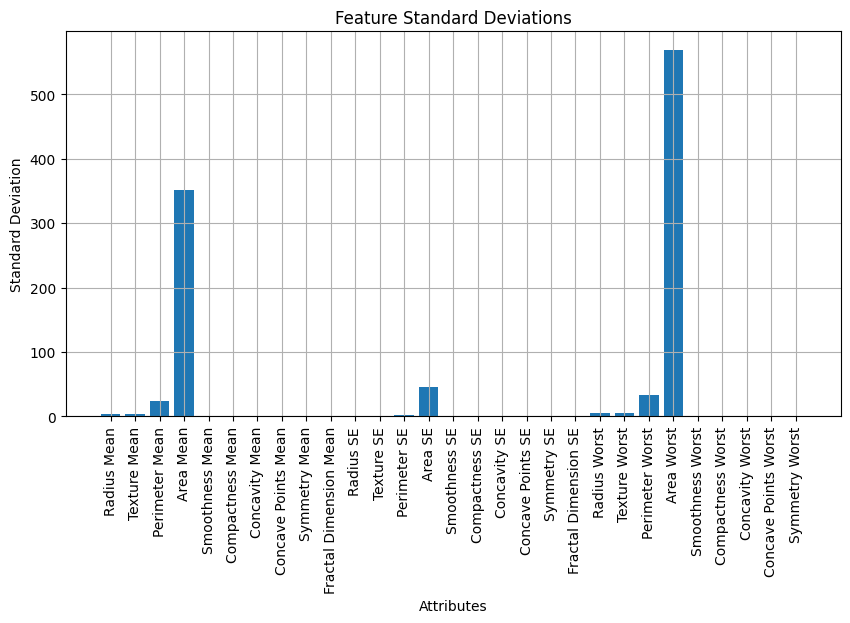

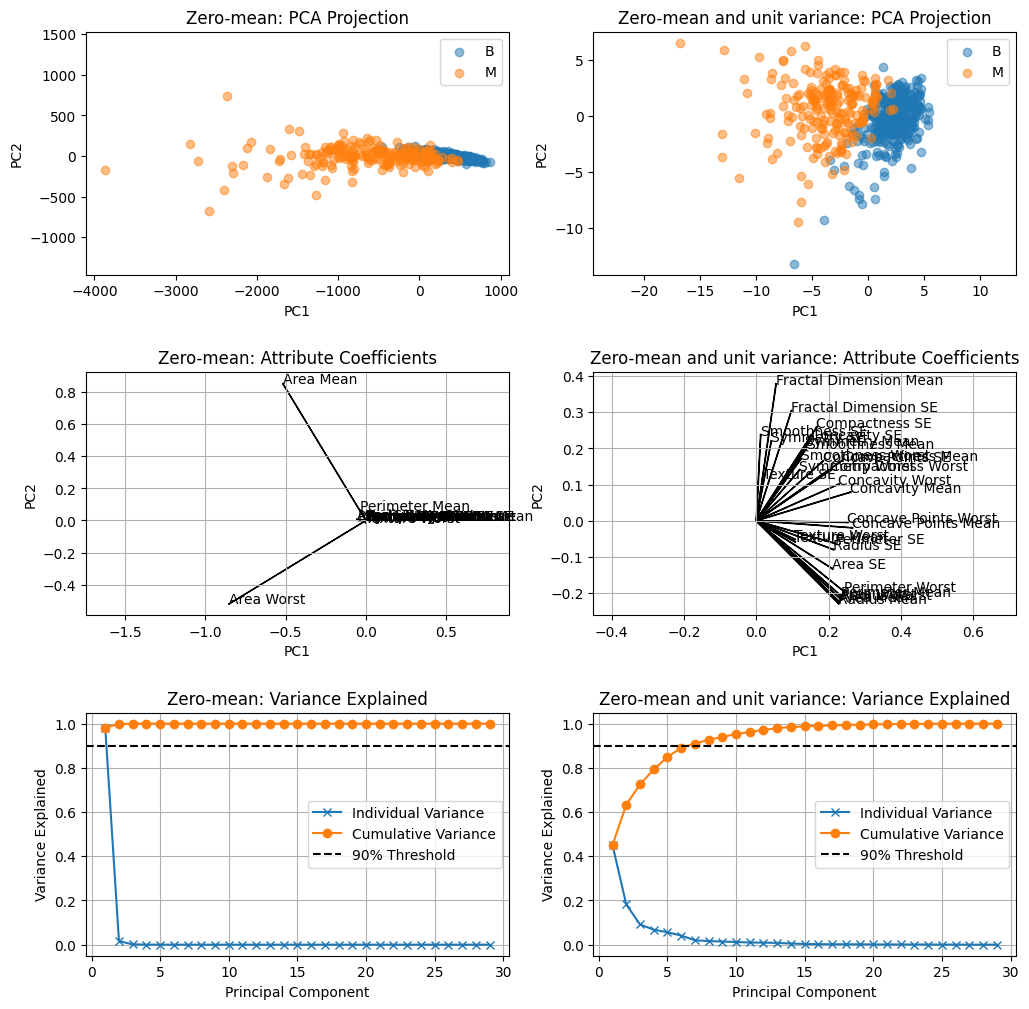

In [24]:
# Compute standard deviations for each feature
plt.figure(figsize=(10, 5))
plt.bar(np.arange(1, X.shape[1] + 1), np.std(X, axis=0))
plt.xticks(np.arange(1, X.shape[1] + 1), attributeNames, rotation=90)
plt.ylabel("Standard Deviation")
plt.xlabel("Attributes")
plt.title("Feature Standard Deviations")
plt.grid()
plt.show()

# Zero-mean data (not standardized)
Y1 = X - np.mean(X, axis=0)

# Standardized data (zero-mean, unit variance)
Y2 = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Store both versions
Ys = [Y1, Y2]
titles = ["Zero-mean", "Zero-mean and unit variance"]
threshold = 0.9
pc1, pc2 = 0, 1  # Principal components to plot

# Create figure
plt.figure(figsize=(12, 12))
plt.subplots_adjust(hspace=0.4)
nrows, ncols = 3, 2  # Grid layout

for k in range(2):
    # PCA
    U, S, Vh = svd(Ys[k], full_matrices=False)
    V = Vh.T

    if k == 1:
        V = -V  # Flip to align with non-standardized PCA

    # Compute variance explained
    rho = (S ** 2) / np.sum(S ** 2)

    # Compute projection onto principal components
    Z = U * S

    # Plot PCA projections
    plt.subplot(nrows, ncols, 1 + k)
    for c in np.unique(y):
        plt.scatter(Z[y == c, pc1], Z[y == c, pc2], alpha=0.5, label=classNames[c])
    plt.xlabel(f"PC{pc1 + 1}")
    plt.ylabel(f"PC{pc2 + 1}")
    plt.legend()
    plt.title(f"{titles[k]}: PCA Projection")
    plt.axis("equal")

    # Plot attribute coefficients in PCA space
    plt.subplot(nrows, ncols, 3 + k)
    for att in range(V.shape[1]):
        plt.arrow(0, 0, V[att, pc1], V[att, pc2])
        plt.text(V[att, pc1], V[att, pc2], attributeNames[att])
    plt.xlim([-1, 1])
    plt.ylim([-1, 1])
    plt.xlabel(f"PC{pc1 + 1}")
    plt.ylabel(f"PC{pc2 + 1}")
    plt.grid()
    plt.title(f"{titles[k]}: Attribute Coefficients")
    plt.axis("equal")

    # Plot cumulative variance explained
    plt.subplot(nrows, ncols, 5 + k)
    plt.plot(range(1, len(rho) + 1), rho, "x-", label="Individual Variance")
    plt.plot(range(1, len(rho) + 1), np.cumsum(rho), "o-", label="Cumulative Variance")
    plt.axhline(y=threshold, color="k", linestyle="--", label="90% Threshold")
    plt.title(f"{titles[k]}: Variance Explained")
    plt.xlabel("Principal Component")
    plt.ylabel("Variance Explained")
    plt.legend()
    plt.grid()

plt.show()